### Libraries

* Numpy
* Pandas
* Matplotlib
* Seaborn
* Scikit-learn
* Tensorflow
* PyTorch
* XGBoost
* LightGBM
* CatBoost
* Keras
* StatsModels
* Optuna
* Eli5
* SHAP
* MlFlow
* Albumentations


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import tensorflow as tf

import torch
import torch.nn as nn

# Highly effective for structured/tabular data
import xgboost as xgb

# For speed and efficiency in gradient boosting
import lightgbm as lgb

# Handles categorical features without preprocessing them into numberical values
from catboost import CatBoostRegressor

# Keras: High-Level API for Tensorflow
from keras.models import Sequential
from keras.layers import Dense

# For statistical analysis, including linear models, time-series analysis, and hyptothesis testing
import statsmodels.api as sm

# For automated hyperparameter tuning
import optuna

# Understand and debug machine learning models by providing detailed explanations for predictions
# import eli5

# xAI with SHAP values
import shap

# Track, serve, save and manage experiments, and helps in model deployment
import mlflow

# Designed for searching the hyperparameter space using algorithms like TPE (Tree of Parzen Estimators)
from hyperopt import fmin, tpe, hp

# Augmentation and image data
import albumentations as A
from PIL import Image

# Feature-engine
from feature_engine.encoding import OneHotEncoder

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
import squarify

In [13]:
dataset_path = "./Datasets/diabetes.csv"
df = pd.read_csv(dataset_path)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Cleaning

In [14]:
# Check for missing values
print(df.isnull().sum())  # Displays count of missing values per column

# Drop rows with missing values
df_cleaned = df.dropna()

# Fill missing values with the mean of the respective columns
df_filled = df.fillna(df.mean())

# Replace a specific value (e.g., -1) with NaN and then fill with the median
df_replaced = df.replace(-1, np.nan).fillna(df.median())

# Interpolate missing values using linear interpolation
df_interpolated = df.interpolate()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Data Visualization Applications

#### 1. **Pie Chart**
**Application**: Use pie charts when you want to show the proportion or percentage distribution of categorical data.
- **Example**: Visualizing the proportion of diabetic vs. non-diabetic patients in the dataset.

**Best for**: Displaying relative proportions of categories within a single variable.

#### 2. **Bar Chart**
**Application**: Bar charts are useful for comparing the count or value of different categories.
- **Example**: Comparing the number of males vs. females in a dataset.

**Best for**: Comparing discrete categories or groups.

#### 3. **Box Chart**
**Application**: Box charts (box plots) are ideal for showing the distribution, spread, and potential outliers in a dataset.
- **Example**: Comparing the distribution of BMI across different age groups.

**Best for**: Summarizing the distribution of a dataset and identifying outliers.

#### 4. **Histogram**
**Application**: Use histograms to visualize the distribution of a continuous variable.
- **Example**: Displaying the distribution of ages in the dataset.

**Best for**: Understanding the frequency distribution of continuous variables.

#### 5. **Heat Map**
**Application**: Heat maps are commonly used to show correlations between numerical features.
- **Example**: A heat map showing the correlation between features such as age, glucose, and insulin levels in the dataset.

**Best for**: Visualizing relationships or correlations between multiple variables in a matrix format.

#### 6. **Box and Whisker Plot**
**Application**: Box and whisker plots are used to display the spread, quartiles, and potential outliers in numerical data.
- **Example**: Displaying the spread of glucose levels across patients.

**Best for**: Comparing distributions between several groups and identifying outliers.

#### 7. **Area Chart**
**Application**: Area charts are used to represent cumulative totals over time or ranges of values.
- **Example**: Showing the cumulative glucose levels over time for different patients.

**Best for**: Visualizing the magnitude of change over time or across categories.

#### 8. **Treemaps**
**Application**: Treemaps are used to show hierarchical data and the proportion of subcategories within a category.
- **Example**: Showing the proportion of various outcomes (like diabetic vs. non-diabetic) using a hierarchical structure.

**Best for**: Visualizing proportions in hierarchical data.

#### 9. **Correlation Matrices**
**Application**: Correlation matrices are used to show the correlation coefficients between different variables.
- **Example**: Displaying the correlation between features such as age, glucose, and insulin levels.

**Best for**: Analyzing relationships between multiple numerical variables.

#### 10. **Bubble Charts**
**Application**: Bubble charts are an extension of scatter plots with a third dimension represented by the size of the points (bubbles).
- **Example**: Displaying the relationship between age and BMI, with the size of the bubble representing glucose levels.

**Best for**: Visualizing relationships between three variables (two dimensions plus the size of the bubbles).


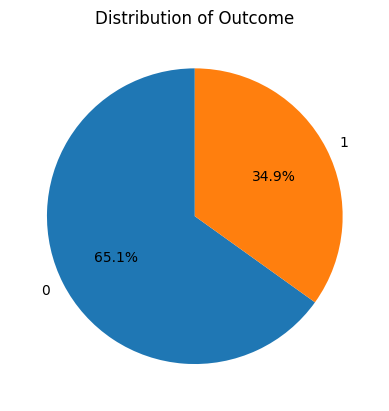

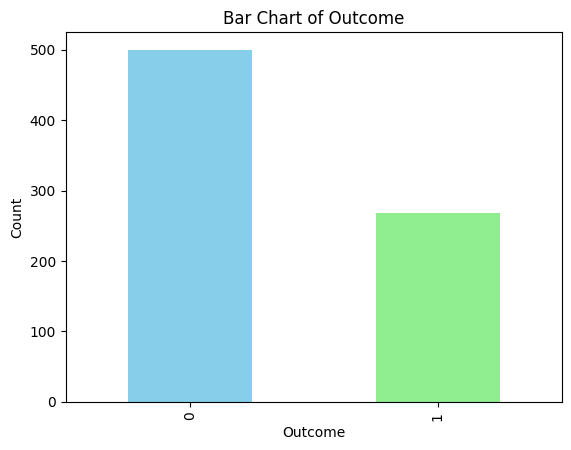

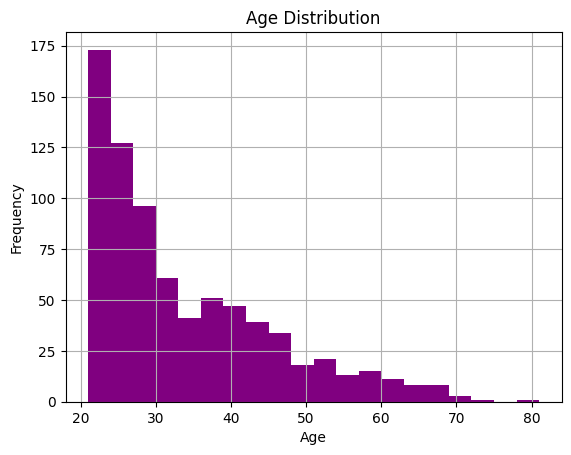

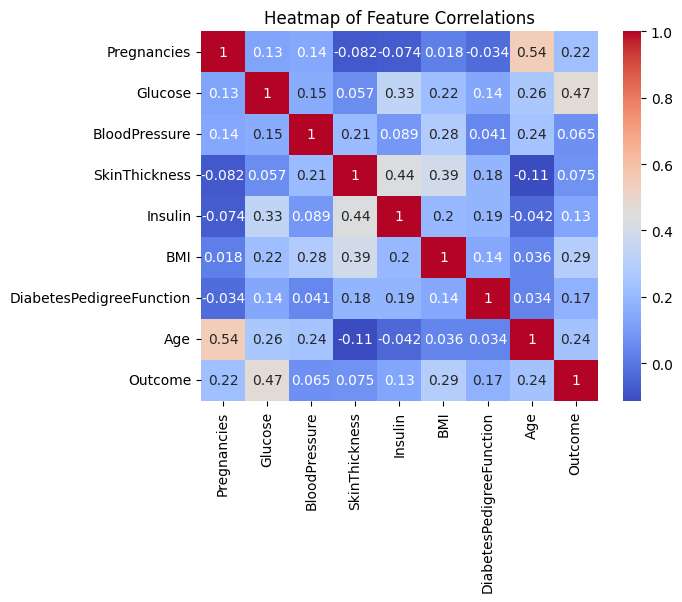

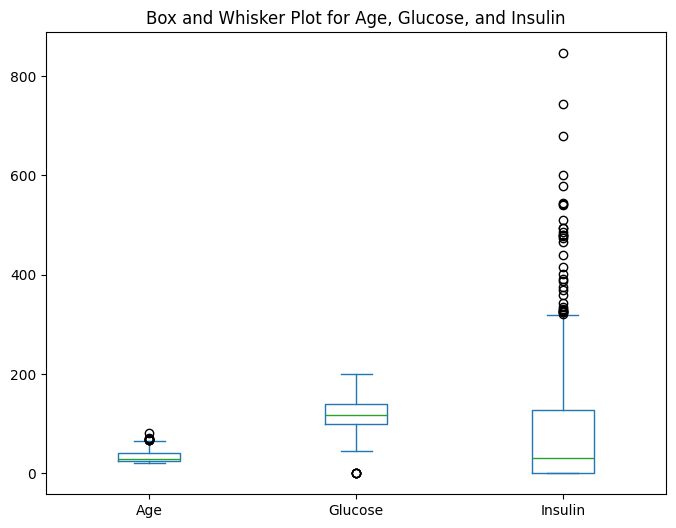

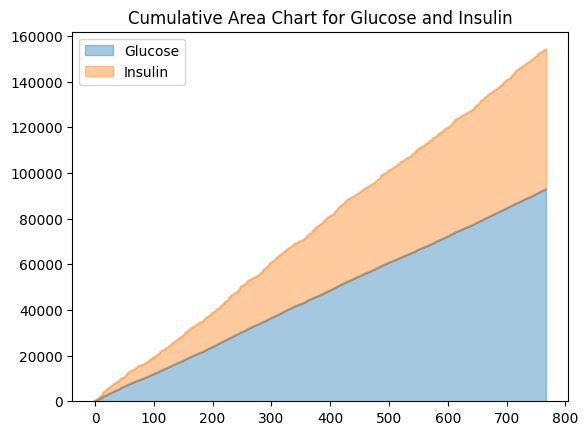

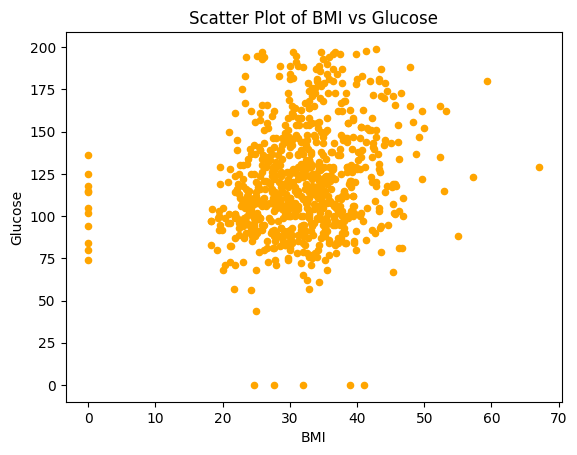

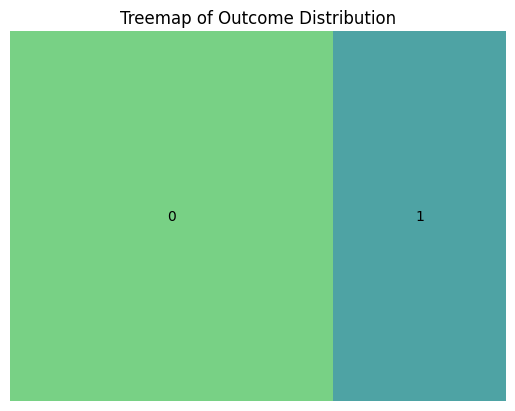

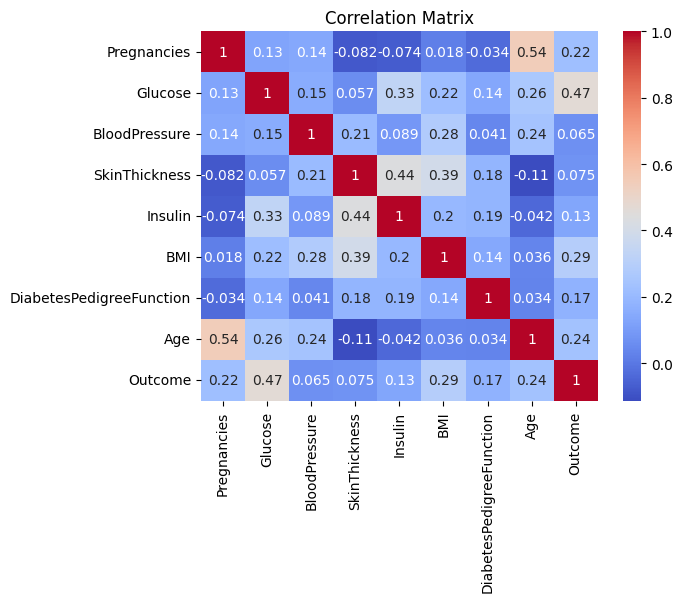

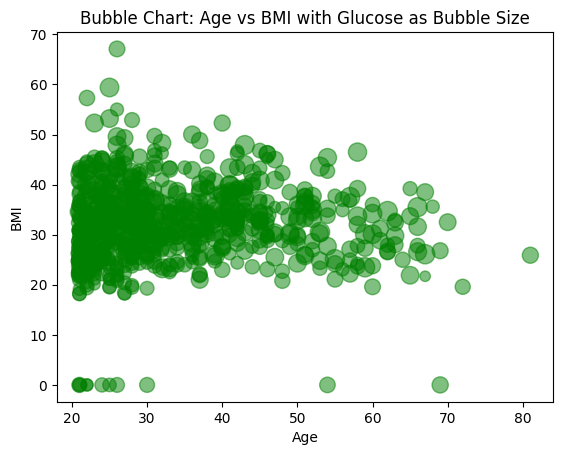

In [18]:

# Pie Chart
outcome_counts = df['Outcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Outcome')
plt.show()

# Bar Chart
outcome_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Bar Chart of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Histogram
df['Age'].hist(bins=20, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Heat Map
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Box and Whisker Plot
df[['Age', 'Glucose', 'Insulin']].plot(kind='box', figsize=(8,6))
plt.title('Box and Whisker Plot for Age, Glucose, and Insulin')
plt.show()

# Area Chart
df[['Glucose', 'Insulin']].cumsum().plot(kind='area', alpha=0.4)
plt.title('Cumulative Area Chart for Glucose and Insulin')
plt.show()

# Scatter Plot
df.plot.scatter(x='BMI', y='Glucose', color='orange')
plt.title('Scatter Plot of BMI vs Glucose')
plt.show()

# Treemap
squarify.plot(sizes=outcome_counts, label=outcome_counts.index, alpha=.8)
plt.axis('off')
plt.title('Treemap of Outcome Distribution')
plt.show()

# Correlation Matrix (Heatmap again)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bubble Chart
plt.scatter(df['Age'], df['BMI'], s=df['Glucose'], alpha=0.5, color='green')
plt.title('Bubble Chart: Age vs BMI with Glucose as Bubble Size')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

### Other exploration

In [ ]:
plt.bar(df['artists'],df['liveness'])
plt.xlabel('artist')
plt.ylabel('liveness')
plt.title("Bar Chart")


In [ ]:
plt.hist(df['tempo'],)
plt.title("Histogram")


**Area Chart**

In [ ]:
#area chart
plt.fill_between(df.index, df['danceability'], label='Danceability')
plt.fill_between(df.index, df['energy'], label='Energy')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Area Chart for Danceability and Energy')
plt.legend()
plt.show()


In [ ]:
# Line Chart
plt.plot(df['energy'])
plt.show()

In [ ]:
plt.scatter(df['energy'], df['key'])
plt.xlabel('energy')
plt.ylabel('key')
plt.title('energy vs key')
plt.show()

**Pie Chart**

In [ ]:
a=df['artists'].value_counts()
plt.pie(a.values,labels=a.index,autopct='%1.1f%%')
plt.title('Artist Distribution')
plt.show()


**Tree map of feature**

In [ ]:

import squarify

value_counts = df['artists'].value_counts()

squarify.plot(sizes=value_counts.values, label=value_counts.index, alpha=.8 )
plt.axis('off')
plt.title('Treemap of Artists')
plt.show()
